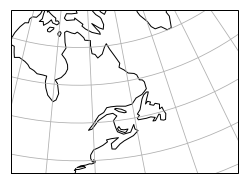

In [1]:
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import numpy as np
import pyproj
import matplotlib
import cartopy

bmap_params = {'llcrnrlat': 39.004303137858841,
               'urcrnrlat': 62.443077596938053,
               'projection': 'rotpole',
               'llcrnrlon': -86.99883217016388,
               'urcrnrlon': -40.221671371989302,
               'lon_0': -73.350000000000009,
               'o_lat_p': 37.878708451507158,
               'resolution': 'l',
               'o_lon_p': 176.70918638372871}

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
plt.figure(figsize=(6, 3))


rpole_crs = ccrs.RotatedPole(pole_longitude=bmap_params["lon_0"] + 180, 
                             pole_latitude=bmap_params["o_lat_p"])

ax = plt.axes(projection=rpole_crs)
ax.coastlines(resolution='110m')

ax.gridlines()
ax.set_extent([bmap_params[key] for key in ['llcrnrlon', 'urcrnrlon', 'llcrnrlat', 'urcrnrlat']]);

-10.8091863837287 15.090813616269832 -12.099999999999987 13.799999999999907


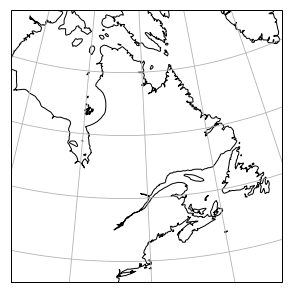

In [2]:
#set extent using projection coordinates
plt.figure(figsize=(6, 5))


rpole_crs = ccrs.RotatedPole(pole_longitude=bmap_params["lon_0"] + 180, 
                             pole_latitude=bmap_params["o_lat_p"])

ax = plt.axes(projection=rpole_crs)
ax.coastlines(resolution='50m')

ax.gridlines()
xll, yll = rpole_crs.transform_point(bmap_params["llcrnrlon"], bmap_params["llcrnrlat"], ccrs.Geodetic())
xur, yur = rpole_crs.transform_point(bmap_params["urcrnrlon"], bmap_params["urcrnrlat"], ccrs.Geodetic())
ax.set_extent([xll, xur, yll, yur], crs=rpole_crs)

#ax.set_extent([bmap_params[key] for key in ['llcrnrlon', 'urcrnrlon', 'llcrnrlat', 'urcrnrlat']])

print(xll, xur, yll, yur);

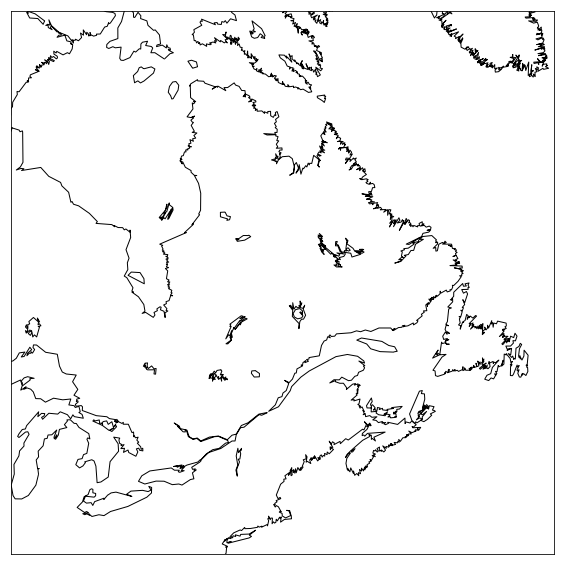

In [3]:
# Basemap
fig,ax = plt.subplots(1,1,figsize=(10,10))
from mpl_toolkits.basemap import Basemap
bmap_params['ax']=ax
b = Basemap(**bmap_params)
b.drawcoastlines();

In [4]:
#http://nsidc.org/data/gis/headers/NL.hdr
cornerx=9024309  #meters, from NL.hdr
cornery=cornerx
newcornerx=cornerx/2.
newcornery=newcornerx
new_extent=[-newcornerx,-newcornerx,newcornerx,newcornerx]
#basemap width, height should be 2*cornerx,2*cornery
orig_crs=dict(init='epsg:3408')
orig_extent=[-cornerx,-cornery,cornerx,cornery]
radius=6371228
new_crs=dict(proj='laea',lat_0=90,lon_0= -90,a=radius,b=radius,units='m')
new_basemap_args=dict(projection='laea',lat_0=90,lon_0= -90,rsphere=(radius,radius))
lat_sep,lon_sep= 10,30
parallels = np.arange(30, 90, lat_sep)
meridians = np.arange(-180, 180, lon_sep)

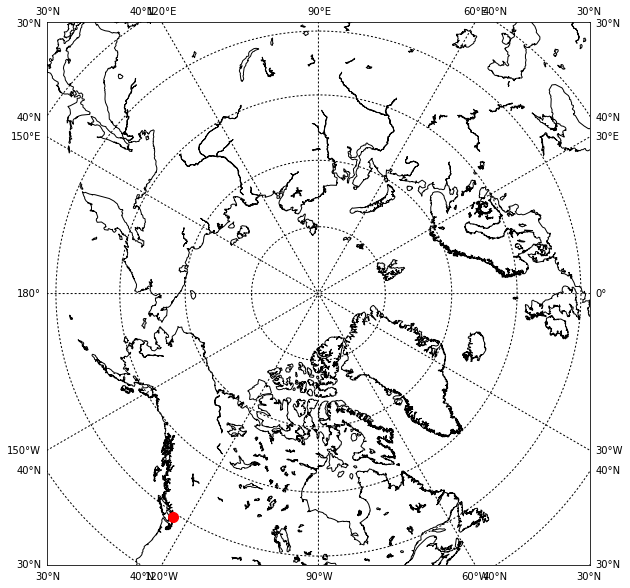

In [5]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
#
# make a copy so changes don't affect new_basemap_args
#
basemap_args=dict(new_basemap_args)
basemap_args.update(dict(width=2*newcornerx,height=2*newcornery,ax=ax,resolution='l'))
bmap_new=Basemap(**basemap_args)
bmap_new.drawcoastlines()
bmap_new.drawparallels(parallels, labels=[1, 1, 1, 1],
                       fontsize=10, latmax=70)
bmap_new.drawmeridians(meridians, labels=[1, 1, 1, 1],
                       fontsize=10, latmax=90)
van_lon,van_lat = [-123.1207,49.2827]
van_x,van_y=bmap_new(van_lon,van_lat)
bmap_new.plot(van_x,van_y,'ro',markersize=10);

In [6]:
cmap=matplotlib.cm.get_cmap('viridis')
vmin=220
vmax=260
the_norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax,clip=False)

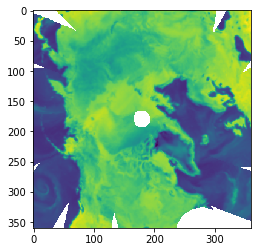

In [7]:
temp19V=np.load('save19.npz')['temps19V'                             ]
fig,ax=plt.subplots(1,1)
ax.imshow(temp19V,origin='upper')

{'a': 6371228, 'b': 6371228, 'proj': 'laea', 'lon_0': -90, 'lat_0': 90, 'x_0': 0.0, 'y_0': 0.0}
-2422235.2316723852 -3712768.5862524547
(-2422235.2316723852, -3712768.5862524547)


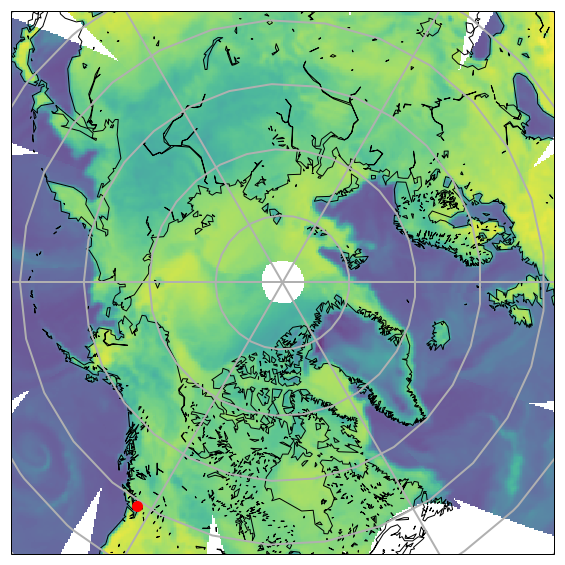

In [10]:
globe = ccrs.Globe(ellipse=None, semimajor_axis=radius, semiminor_axis=radius)
projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90,central_longitude= -90,globe=globe)
print(projection.proj4_params)
fig, ax = plt.subplots(1, 1, figsize=(10,10),
                       subplot_kw={'projection': projection})
new_extent=[-newcornerx,newcornerx,-newcornery,newcornery]
ax.set_extent(new_extent,projection)
#ax.coastlines(resolution='50m')
van_x,van_y=projection.transform_point(van_lon,van_lat,ccrs.Geodetic())
ax.plot(van_x,van_y,'ro',markersize=10);
ax.gridlines(linewidth=2);
ax.add_feature(cartopy.feature.GSHHSFeature(scale='coarse', levels=[1,2,3]))
#ax.add_feature(cartopy.feature.RIVERS)
ax.imshow(temp19V,origin='upper',cmap=cmap,transform=projection,extent=new_extent,alpha=0.8)
print(van_x,van_y)
check_proj=pyproj.Proj(projection.proj4_params)
print(check_proj(van_lon,van_lat))